In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

%load_ext autoreload
%autoreload 2

In [2]:
DATA = 1
PT = True
if PT: 
    from pre_train2 import *
else:
    from main5 import * 
X_train, Y_train = load_data(DATA)

In [4]:
tf.reset_default_graph()
if PT: 
    Y_train_ = np.stack([Y_train.squeeze()]*3,axis=3)
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 245, 437, 3])
    Y = tf.placeholder(tf.float32, [None, 245, 437, 1])
is_training = tf.placeholder(tf.bool)
output = DACNet(X,is_training,DATA)
loss = tf.nn.l2_loss(output-Y)
mean_loss = tf.reduce_mean(loss)

In [5]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
saver = tf.train.Saver()
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    saver.restore(sess, './Models/PT_data_1_epochs_10_batchsize_3_rate_0.01_decay_1.0')
if DATA == 0:
    saver.restore(sess, './Models/NYU/data_0_epochs_2_batchsize_3_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./Models/PT_data_1_epochs_10_batchsize_3_rate_0.01_decay_1.0


In [6]:
for var in tf.global_variables():
    print(var)
    print(var.eval(session=sess))

<tf.Variable 'c1/kernel:0' shape=(2, 2, 3, 32) dtype=float32_ref>
[[[[-1.06443191 -0.903032    0.98278219  0.05950324  0.33382335 -0.1587597
    -1.3392446   0.48910946  0.16758366  0.12888227 -2.15045357  0.42203647
     1.30645084  0.19366844  0.08800825 -1.42349863  0.69616491  0.10550591
     0.03764654 -0.34589687  0.03664626 -0.52765882  0.18557133 -0.21213439
     0.30283085 -0.32330403  0.20603521  0.14225003 -0.19821031 -0.15583135
    -0.01820664 -0.52754545]
   [-1.08630884 -0.65397519  0.93472475 -0.09092663  0.40907815  0.02466273
    -1.46327281  0.36907303  0.09131462  0.01635144 -2.07011414  0.11128392
     1.28014219 -0.12985966  0.17941034 -1.47315121  0.57600111  0.16713431
     0.06801629 -0.05355157 -0.26200178 -0.41971502  0.02713687  0.07738044
     0.06503207 -0.13453127  0.01515003  0.11611437 -0.43862659 -0.15059106
    -0.05230691 -0.43825305]
   [-1.07152402 -1.01507211  0.70090723  0.03618009  0.14741908 -0.11855368
    -1.58507991  0.54909039 -0.00868418  

2.47097e+11


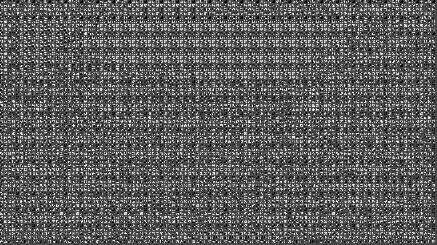

In [18]:
i = 7
IMG, img_loss = sess.run([output, mean_loss], {X: Y_train_[i:i+1,...],
                                              Y: Y_train[i:i+1,...],
                                                 is_training: False})
print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG)*255.0))

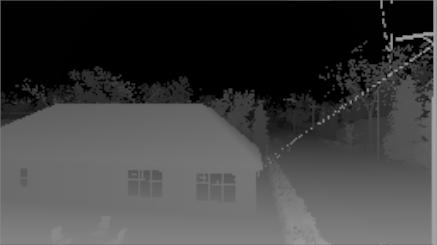

In [17]:
Image.fromarray(np.uint8(np.squeeze(Y_train[i,:,:,:]*255.0)))

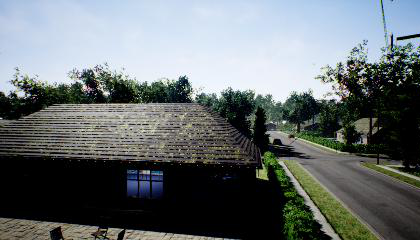

In [11]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))

In [16]:
IMG

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        ..., 
        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ..., 
         [ 0.],
         [ 0.],
         [ 0.]]]], dtype=float32)